In [2]:
# 1. Introduction
# Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks.
#It is a type of ensemble learning method, where a group of weak models combine to form a powerful model.
#They operates by constructing a multitude of decision trees at training time.
#They give output of the class that is the mode of the classes or mean/average prediction of the individual trees.

In [3]:
# 2. Problem Statement
#RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean on 15 April 1912.
#On April 15, 1912 the Titanic sank, costing the lives of 1502 out of 2224 passengers and crew.
#Unfortunately, there weren’t enough lifeboats for everyone onboard, causing a disproportionate number of deaths.
#The reason behind sinking of this beauty was because of striking to an iceberg while travelling from Southampton to New York City.
#While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.


In [4]:
#Scenario
#One of the most popular disasters in the history is the sinking of the RMS Titanic.
#Let's say, after the accident, there is a need to implement better regulations for passenger liners.
#As a part of a data science team, you have been tasked with analyzing the passenger data of the RMS Titanic.
#You have been provided with the data that contains the information about the passengers aboarded the ship.
#The purpose is to analyze and explore factors that can influence a person’s likelihood to survive.
#So, the primary objectives are to:
#Do a statistical analysis of how some group of people were survived more than others.
#Perform an Exploratory Data Analysis of titanic dataset with visualizations and storytelling.
#Do modelling of data to come up with a model with best fit of accuracy score and which explains the 
#solution of above issue appropriately.

In [5]:
# 3. Installing Libraries

In [39]:

#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
                     
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
from scipy.stats import randint as sp_randint                       # For initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To scaled data with mean 0 and variance 1
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.model_selection import RandomizedSearchCV              # To find best hyperparamter setting for the algorithm
from sklearn.ensemble import RandomForestClassifier                 # To implement random forest classifier
from sklearn.tree import DecisionTreeClassifier                     # To implement decision tree classifier
from sklearn.metrics import classification_report                   # To generate classification report
from sklearn.metrics import plot_confusion_matrix                   # To find best hyperparamter setting for the algorithm
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

In [ ]:
# 4. Data Acquisition & Description- 

In [ ]:
# The dataset consists of the information about people boarding the famous RMS Titanic.
#Records	Features	Dataset Size
#891	12	58.9 KB

#ID	Feature Name	Description of the feature
#01	PassengerId	Identity of the passenger
#02	Survived	Whether the passenger survived or not
#03	Pclass	Class of the ticket holder
#04	Name	Name of the passenger
#05	Sex	Sex of the passenger
#06	Age	Age of the passenger
#07	SibSp	Siblings and/or spouse travelling with passenger
#08	Parch	Parents and/or children travelling with passenger
#09	Ticket	Ticket number
#10	Fare	Price of the ticket
#11	Cabin	Cabin number
#12	Embarked	Port of Embarkation

In [2]:
# Load the data
data = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv')

# Get the dimesions of data
print('Shape of the dataset:', data.shape)

# Output first 5 data rows
data.head()

Shape of the dataset: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#4.1 Data Description
#In this section we will get information about the data and see some observations.

In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Observations:
    
#Survived:
#More than 50% did not survive the accident.

#Pclass:
#There are a lot more 3rd class passengers than 1st and 2nd class.
#We can also see that there are more 2nd class passengers than 1st class passengers.
#SibSp:
#More than 50% of passengers are not travelling with their siblings or a spouse.
#There are some passengers who are travelling with as maximum as 8 siblings and spouse.
#Parch:
#More than 75% passengers are not travelling with a parent or children
#But there are some passengers who have a maximum number of 6 children and/or parents with them on the ship.
#We observe that a vast majority of passengers are not travelling with their family members.
#Age:
#The average age of passengers is around 29 years while the minimum and maximum ages are 0.4 years and 80 years respectively.
#There is some missing data in the Age feature.
#Fare:
#The average price of ticket seems to be £32.2. Minimum price of the ticket is recorded as £0 and maximum price recorded as high as £512.32.
#More than 50% of the passengers have paid atleast £14
#More than 75% passengers have paid atleast £7 for their ticket whereas less than 25% have paid for more than £31.
#We have to replace the minimum value in the Fare feature with a reasonable value.

In [ ]:
#4.2 Data Information

In [ ]:
#In this section we will see the information about the types of the features

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Observations:
#The data types of all the features look appropriate.
#There are missing values present in the Age, Cabin and Embarked features.
#Age and Cabin have a significant amount of missing values which requires further investigation.

In [ ]:
#5. Data Pre-processing

In [ ]:
#5.1 Data Pre-profiling

In [ ]:
#For quick analysis pandas profiling is very handy.
#Generates profile reports from a pandas DataFrame.
#For each column statistics are presented in an interactive HTML report.

In [ ]:
# profile = ProfileReport(df=data)
# profile.to_file(output_file='Pre Profiling Report.html')
# print('Accomplished!')

In [ ]:
**Observations:**

- The report shows that there are a **total** of **12 features** out of which **7** are **numerical** and **5** are **categorical**.

- Only **342** passengers out of **891** survived the accident.

- **Name**, **Ticket**, and **Cabin** features have high cardinality and are uniformly distributed.

- **PassengerId** is having a uniformly distribution in the dataset.

- **Fare** feature is highly skewed towards right while **Age** feature is faily symmetrical.

- There are **no duplicate** rows in the dataset while a lot of **zeros** are present in **Fare**, **Sibsp** and **Parch** features.

- We can observe that **8.1%** of data in cells is **missing**:
  - Age (17 missing values) &rarr; Fill with median.
  - Cabin (687 missing values) &rarr; Fill with median.
  - Embarked (2 missing values) &rarr; Fill with mode.

- **Embarked** feature has just **2 missing values**.

- For detailed information, check the **Pre Profiling Report.html** file.

In [ ]:
# 5.2 Data Cleaning

In [ ]:
#Now we will perform all the necessary operations that are required to clean and rectify the schema of the dataset.

In [5]:
# Filling the missing values of Embarked feature with the mode of the feature.
data['Embarked'] = data['Embarked'].fillna(value=data['Embarked'].mode()[0])

# Filling the missing values of Age feature with the median age.
data['Age'].fillna(value=data['Age'].median(), inplace=True)

# Dropping the Cabin feature as has many missing values
data.drop(labels='Cabin', axis=1, inplace=True)

In [ ]:
# 5.3 Data Post Profilling
#Next, we will generate and verify the report to identify any new observation that can help us in further analysis.

In [ ]:
# post_profile=ProfileReport(df=data)
# post_profile.to_file(output_file='Post Profiling Report.html')
# print('Accomplished!')

In [ ]:
Observations:
You can compare the two reports, i.e Pre Profiling Report.html and Post Profiling Report.html.
Observations in Post Profiling Report.html:
In the Dataset info, Total Missing = 0.0%
Number of features = 11
You can see the difference in the Age feature in both the reports.
A lot of zeros are present in Sibsp and Parch features. They won't be removed as they are necessary.
We can observe that Pclass and Fare are highly correlated to each other inversely.
A lot of inverse correlations are observed among the features.
For detailed information, check the Post Profiling Report.html file.
We can now begin the Exploratory Data Analysis.

In [ ]:
# 6. Exploratory Data Analysis

In [ ]:
#Before diving further, we will create some new features that will be useful for analyzing the data.
#These features will be FamilySize 
#The FamilySize will describe the frequency of family members.

In [6]:
# Creating a new feature FamilySize from Sibsp and Parch
data['Family Size'] = data['SibSp'] + data['Parch'] + 1

data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [7]:
# Creating another variable for easy analysis i.e Gender calss in which all passenger less than 15 years will be child other 
# will be described as per 'sex' variable
#lambda argument : expression
# e.g z = lambda a : a*a
# z(3)

data['GenderClass']= data.apply(lambda x: 'child' if x['Age']<15 else x['Sex'], axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,male


In [ ]:
# Creating crsoss tabs to assess data further

In [105]:
data.groupby(['Sex']).mean()[["Survived"]]

# Interpretation- The survival among female passengers was more than male passengers.

,Survived
Sex,
female,0.742038
male,0.188908


In [106]:
data.groupby(['GenderClass']).mean()[["Survived"]]

#Interpretation- The survival among passengers was highest in females followed by children. 

,Survived
GenderClass,
child,0.576923
female,0.760000
male,0.163569


In [107]:
data.groupby(['GenderClass', 'Pclass']).mean()[["Survived"]]

# Interpretation- The survival among passengers of 1st and 2nd class among Children as well females was high.

Survived
GenderClass Pclass          
child       1       0.800000
            2       1.000000
            3       0.407407
female      1       0.978261
            2       0.909091
            3       0.504274
male        1       0.352941
            2       0.080808
            3       0.118750

In [ ]:
#7. Post Data Processing

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,male


In [ ]:
#7.1 Feature Selection
#Here we will visualize  the correlation of input features using Heatmap.
#If we see a case of correlation we will remove the highly correlated feature.

In [109]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family Size
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.065997
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.245619
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.217138
Family Size,-0.040143,0.016639,0.065997,-0.245619,0.890712,0.783111,0.217138,1.000000


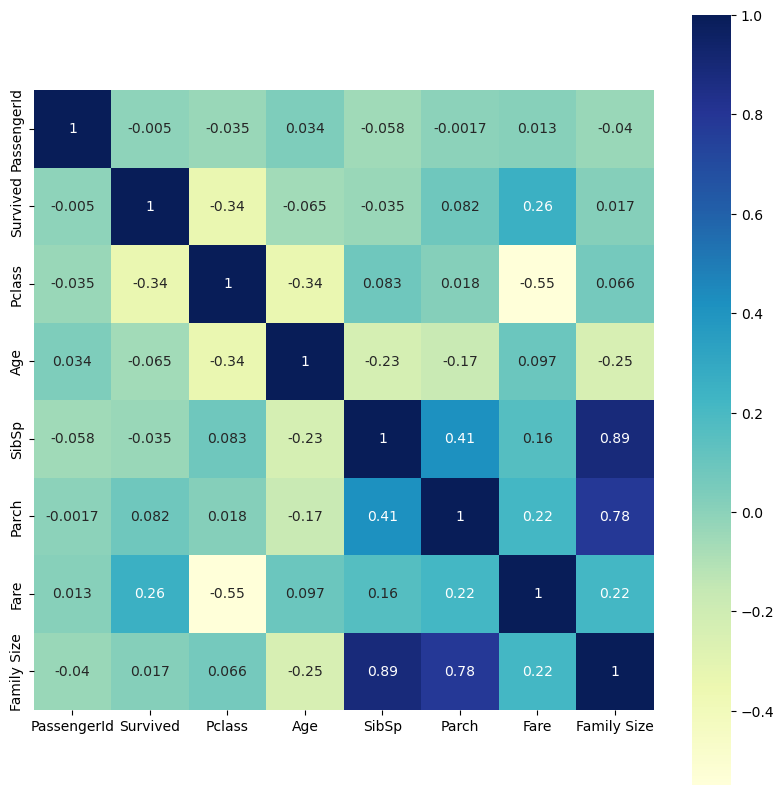

In [9]:
cor = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor, cmap='YlGnBu', annot=True, square=True)
plt.show()

# cmap gives color to map of yellow green and blue. Annot helps in putting correlation values in each square
# and square helps in making the garph more presentable

# Interpretation:-

# Age and Pclass are negatively corelated with Survived.
#FamilySize is made from Parch and SibSb only therefore high positive corelation among them.
#Fare and FamilySize are positively coorelated with Survived.
#With high corelation we face redundancy issues.

In [ ]:
# We will drop few features like 'Name','Ticket','SibSp','Parch', 'Ticket', 'PassengerId'

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,male


In [11]:
data.drop(labels= ['PassengerId','Name','Sex','SibSp','Parch','Ticket'], axis=1, inplace=True)

In [12]:
data.head()

,Survived,Pclass,Age,Fare,Embarked,Family Size,GenderClass
0,0,3,22.0,7.2500,S,2,male
1,1,1,38.0,71.2833,C,2,female
2,1,3,26.0,7.9250,S,1,female
3,1,1,35.0,53.1000,S,2,female
4,0,3,35.0,8.0500,S,1,male


In [ ]:
#7.2 Data Encoding
#In this section, we will encode our categorical features such as Sex, Embarked, Title using one hot encoding.

#Hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model. 
#The advantages of using one hot encoding include: It allows the use of categorical variables in models that 
#require numerical input.

In [13]:
# Performing one hot encoding over sex, embarked, title
data = pd.get_dummies(data=data, columns=['Embarked', 'GenderClass'])
data.head(2)

,Survived,Pclass,Age,Fare,Family Size,Embarked_C,Embarked_Q,Embarked_S,GenderClass_child,GenderClass_female,GenderClass_male
0,0,3,22.0,7.2500,2,0,0,1,0,0,1
1,1,1,38.0,71.2833,2,1,0,0,0,1,0


In [ ]:
#7.3 Data Preparation
#No data scaling is required for Decision Tree as they are giant if-else conditional statements.

#Spliting of data into dependent and independent variables for further development

In [14]:
# Instatiatig input and output data by dropping unnecessary data features
X = data.loc[ : ,data.columns!='Survived']

X.head()

# The loc command The function . loc is typically used for label indexing and 
#can access multiple columns, while . iloc is used for integer indexing

,Pclass,Age,Fare,Family Size,Embarked_C,Embarked_Q,Embarked_S,GenderClass_child,GenderClass_female,GenderClass_male
0,3,22.0,7.2500,2,0,0,1,0,0,1
1,1,38.0,71.2833,2,1,0,0,0,1,0
2,3,26.0,7.9250,1,0,0,1,0,1,0
3,1,35.0,53.1000,2,0,0,1,0,1,0
4,3,35.0,8.0500,1,0,0,1,0,0,1


In [15]:
y = data.Survived

y.shape

(891,)

In [ ]:
#7.4 Splitting data into test and train dataset

In [30]:
#Splitting data into testing and training dataset)

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,  test_size=0.20, stratify=y)    
    
#Display the shape of training and testing data
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

#random_state command helps to split  In other words, it ensures that the same randomization is used each time you run 
#the code, resulting in the same splits of the data

#test_size test_size determines the portion of the data which will go into test sets 
# and a random state is used for data reproducibility

#The stratify command The sole purpose of the argument is to ensure that the same proportion of examples 
# is preserved across each class of training and testing data.

X_train shape:  (712, 10)
y_train shape:  (712,)
X_test shape:  (179, 10)
y_test shape:  (179,)


In [18]:
#8. Model Developement and Evaluation

#In this section we will develop a decision Tree model and Random Forest
#Then we will analyze the results obtained and make our observations.
#For evaluation purpose we will focus on Precision, Recall and Accuracy scores.
#We will do hyperparameter tuning and see if the scores improves.

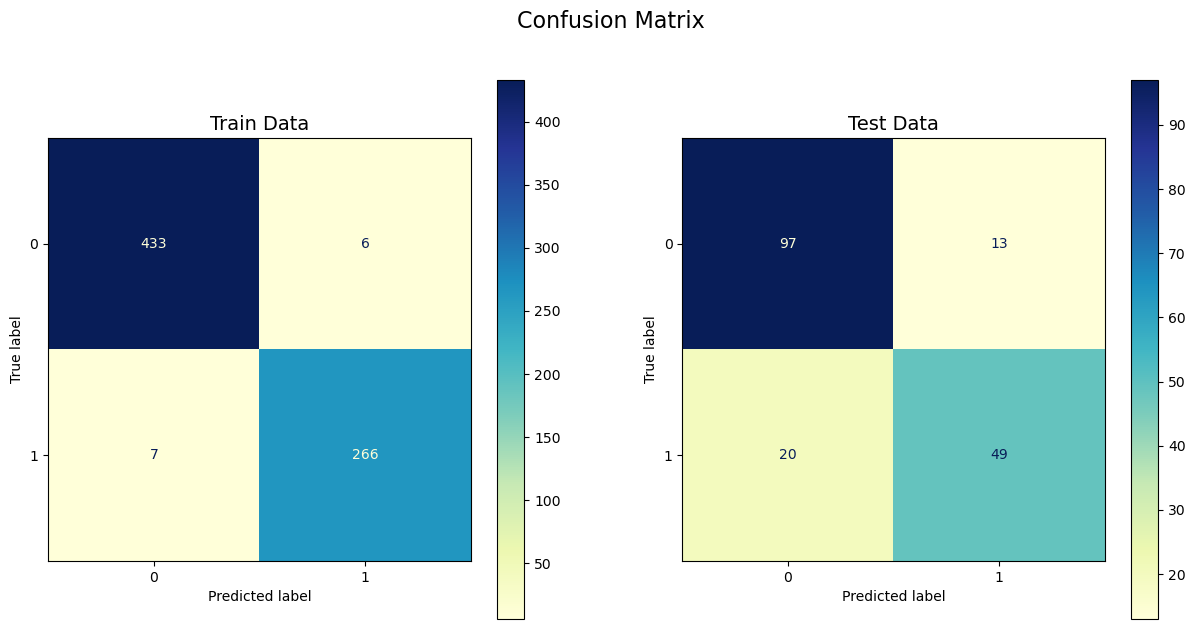

In [31]:
#8.1 Base model using random forest classifier

clf = RandomForestClassifier(random_state=42,class_weight='balanced')
clf.fit(X_train,y_train)

#predicting training and testing labels
y_train_pred_count = clf.predict(X_train)
y_test_pred_count = clf.predict(X_test)

#plotting confusion matrix of test and train data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=clf, X=X_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=clf, X=X_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

In [ ]:
#Train Data:
#Model predicted 433 instances correctly for negative class while 266 instances were predicted correctly for positive class.
#Model identified 6 instances negative but in actual they were positive.
#Model identified 7 instances positive but in actual they were negative.
#Test Data:
#Model predicted 97 instances correctly for negative class while 49 instances were predicted correctly for positive class.
#Model identified 13 instance negative but in actual it was positive.
#Model identified 20 instances positive but in actual they were negative.

In [32]:
train_report = classification_report(y_train, y_train_pred_count)
test_report = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(train_report)
print('                    Testing Report           ')
print(test_report)

#The model shwons accuracy of 98% in train data and 82% in test data.
#Difference in train and test accuracy is more than 5% so the model is overfitted

                    Training Report          
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       439
           1       0.98      0.97      0.98       273

    accuracy                           0.98       712
   macro avg       0.98      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712

                    Testing Report           
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       110
           1       0.79      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



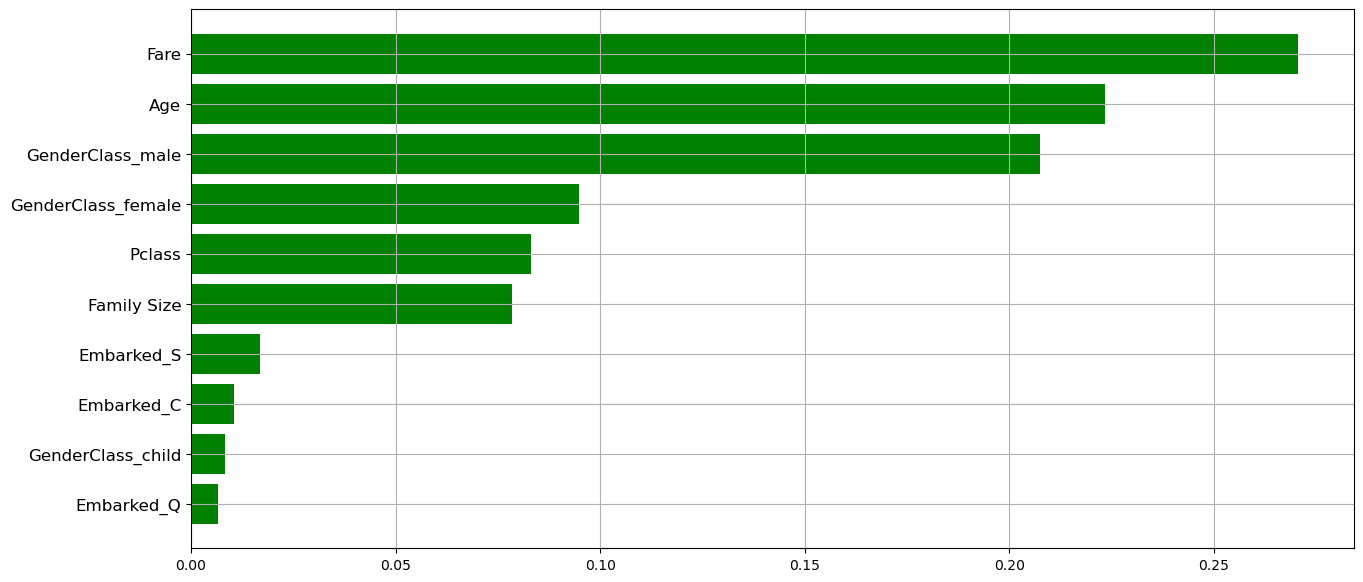

In [33]:
#Feature Importance

features = X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=[15, 7])
plt.barh(y=range(len(indices)), width=importances[indices], color='g', align='center')
plt.yticks(ticks=range(len(indices)), labels=[features[i] for i in indices], size=12)
plt.grid(b=True)
plt.show()


#Feature importance refers to techniques that assign a score to input features based on how 
#useful they are at predicting a target variable.

In [ ]:
#8.2 Hyperparameter Optimized Model Development & Evaluation
#Here we will develop random forest classifier using some hyperparameter setting.
#We will be applying RandomizedsearchCV method for exhaustive search over specified parameter values of estimator.
#To know more about the different parameters in random forest classifier, refer the documentation.
#Below we will apply gridsearch over the following parameters:
#criterion
#max_depth
#n_estimators
#min_samples_split
#min_samples_leaf
#You can change other parameters also and compare the impact of it via calculating accuracy score & confusion matrix

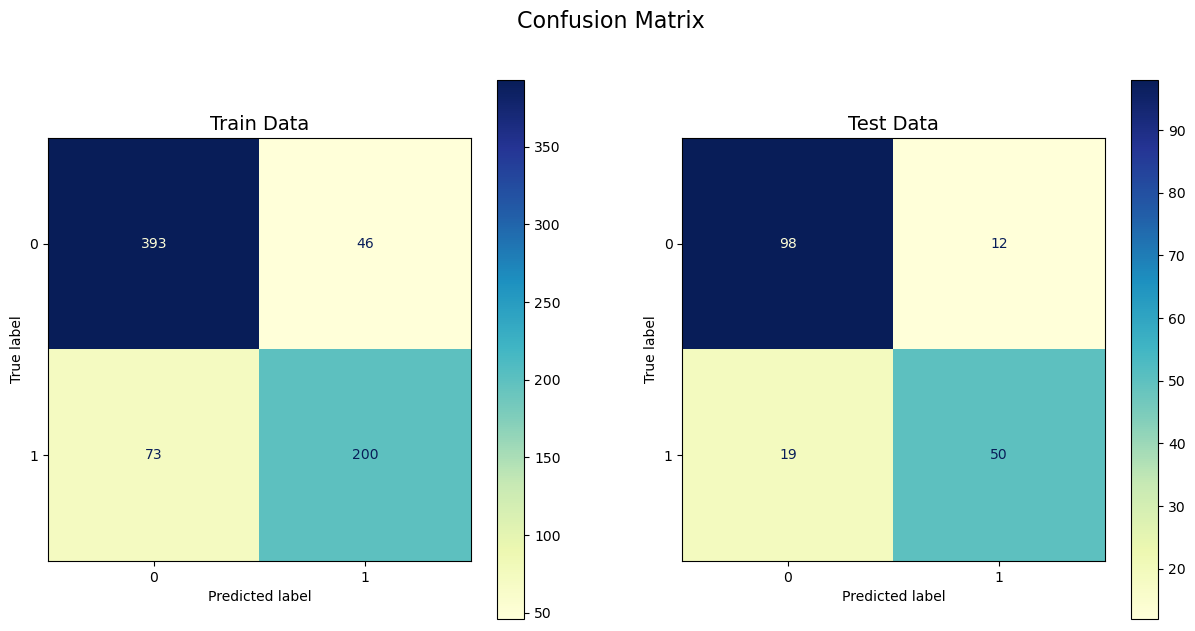

In [42]:
# Specify parameters and distributions to sample from
param_dist = {"max_depth": range(2,5),
              "min_samples_split": sp_randint(2,11),
              "min_samples_leaf": sp_randint(1,11),
              "bootstrap": [True,False],
              "n_estimators": [100, 400, 700, 1000, 1500],
              'max_features': ['sqrt','log2', None]
}


#run randomized search

random_search = RandomizedSearchCV(estimator=clf,
                                  param_distributions=param_dist,
                                  n_iter=50,
                                  n_jobs=-1)

random_search.fit(X_train, y_train)

#Predicting training and testing labels
y_train_pred_count = random_search.predict(X_train)
y_test_pred_count = random_search.predict(X_test)


# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=random_search, X=X_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=random_search, X=X_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()


In [43]:
train_report = classification_report(y_train, y_train_pred_count)
test_report = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(train_report)
print('                    Testing Report           ')
print(test_report)

#The accuracy score of train and test data improved. 
#We can observe that our hyperoptimized model results have improved from the baseline model resuls.
#Now, our model is generalizing very well i.e same result on test set as that of train set.

                    Training Report          
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       439
           1       0.81      0.73      0.77       273

    accuracy                           0.83       712
   macro avg       0.83      0.81      0.82       712
weighted avg       0.83      0.83      0.83       712

                    Testing Report           
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       110
           1       0.81      0.72      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



In [ ]:
#9 Interpretation
#We have seen the impact of various factors such as Gender, Age, Port of Embarkment, FamilySize on the rate of survival.
#Women have a higher chances of survival than men.
#We have done feature selection and removed the features which does not seem to have any effect in our objective.
#We performed model development using default and custom parater settings using RandomSearchCV.
#RandomSearchCV turns out to give better results than baseline model.


#Modelling has shown that by adding several criterias like Gini, entropy, which help in selection of attribute
# of splitting, other decision tree pruning methods for managing overfitting like
# maximum depth, minimum sample leaf and minimum sample split, bootstrap, n_estimators,maximum featuers managed to 
#improve the difference between the accuracy score of test as well as train data
#But for final interpretation on which model fits best we need statistical tests like AUC
# for interpretation.
